# Linear Models 

A method for regression, using the linear combination of input features for the target prediction\
$\hat{y}(w,x) = w_0 + w_1x_1 + ... + w_px_p$\
where $\hat{y}$ is the predicted value, $w=(w_1,...w_p)$ is the weight parameter and x is input feature vector




## 1.0 Ordinary Least Square
OLS is the simplest regression technique, and in this case, we strive to decrease the residual sum of squares between the predicted and the targets.\
$\underset{w}{min}\left\| Xw - y\right\|_2^{2}$\
For this we can use a simple module provided by ScikitLearn\
LinearRegression 

In [10]:
from sklearn import linear_model
import pandas as pd
reg = linear_model.LinearRegression()
reg?

Type:        LinearRegression
String form: LinearRegression()
File:        c:\users\agarw\anaconda3\envs\masterenv\lib\site-packages\sklearn\linear_model\_base.py
Docstring:  
Ordinary least squares Linear Regression.

LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
to minimize the residual sum of squares between the observed targets in
the dataset, and the targets predicted by the linear approximation.

Parameters
----------
fit_intercept : bool, default=True
    Whether to calculate the intercept for this model. If set
    to False, no intercept will be used in calculations
    (i.e. data is expected to be centered).

normalize : bool, default=False
    This parameter is ignored when ``fit_intercept`` is set to False.
    If True, the regressors X will be normalized before regression by
    subtracting the mean and dividing by the l2-norm.
    If you wish to standardize, please use
    :class:`~sklearn.preprocessing.StandardScaler` before calling ``fit``
    

### Example 1

In [2]:
print("Example for Linear Rgerssion")
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
# Description about dataset
diabetes = datasets.load_diabetes(as_frame=True)
print(list(diabetes))
print(diabetes['DESCR'])
print(diabetes['feature_names'])
print("Input Features")
print(diabetes['data'])
print("Target")
print(diabetes['target'])


Example for Linear Rgerssion
['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename']
.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
     

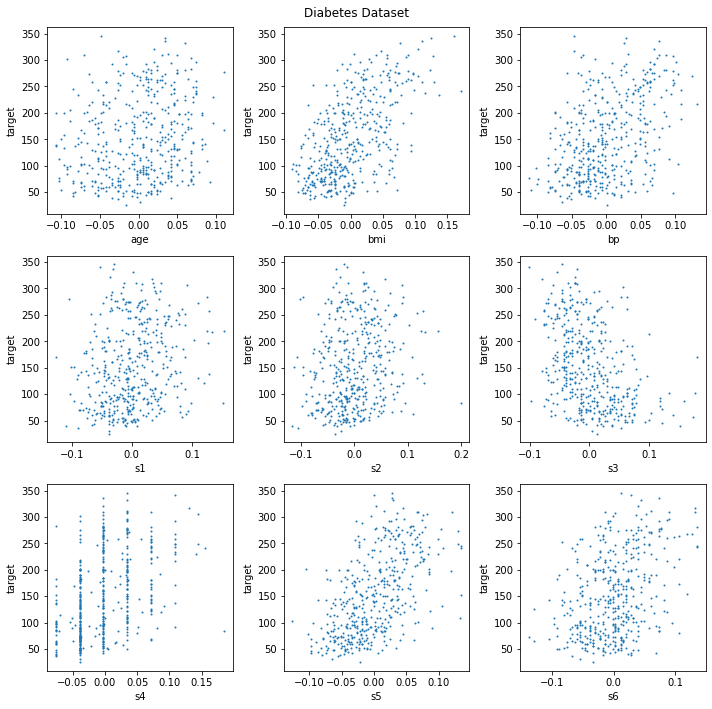

In [3]:
import matplotlib.pyplot as plt

# Don't plot the sex data
features = diabetes['feature_names']
features.remove('sex')

# Plot
fig, axs = plt.subplots(3, 3, figsize=(10, 10), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)
fig.suptitle('Diabetes Dataset')
for i in range(3):
    for j in range(3):
        n = j + i * 3
        feature = features[n]
        axs[i, j].scatter(diabetes['data'][feature], diabetes['target'], s=1)
        axs[i, j].set_xlabel(feature)
        axs[i, j].set_ylabel('target')
plt.tight_layout()
plt.show()

Coefficients:  [684.3254748]
Intercept:  151.83231128314614
Mean squared error: 4505.84
Coefficient of determination: 0.26


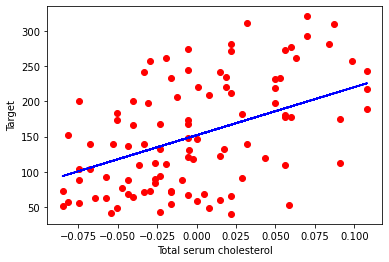

In [8]:
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 3]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-100]
diabetes_X_test = diabetes_X[-100:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-100]
diabetes_y_test = diabetes_y[-100:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print("Coefficients: ", regr.coef_)
print("Intercept: ", regr.intercept_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color="red")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue")
plt.ylabel("Target")
plt.xlabel("Total serum cholesterol")

# plt.xticks(())
# plt.yticks(())

plt.show()

In [9]:
# More details about the pretrained model can be seen down below
regr.__dict__

{'fit_intercept': True,
 'normalize': False,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'n_features_in_': 1,
 'coef_': array([684.3254748]),
 '_residues': 1660534.8594694338,
 'rank_': 1,
 'singular_': array([0.87038011]),
 'intercept_': 151.83231128314614}

### Example 2

In [13]:
import os
print(os. getcwd())

c:\D_drive\Practise\ML\LinearModels


In [21]:
#(https://github.com/GeostatsGuy)
file = 'c:\D_drive\Practise\ML\Dataset\Petroleum.csv'
df = pd.read_csv(file)
df.head(10)

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832
5,6,14.53,4.81,2.69,53.60,0.94,1.67,4395.763259
6,7,13.49,3.60,2.93,63.71,0.80,1.85,4104.400989
7,8,11.58,3.03,3.25,53.00,0.69,1.93,3496.742701
8,9,12.52,2.72,2.43,65.77,0.95,1.98,4025.851153
9,10,13.25,3.94,3.71,66.20,1.14,2.65,4285.026122


Description of headers

Well : well index\
Por : well average porosity (%)\
Perm : permeability (mD)\
AI : accoustic impedance (kg/m2s*10^6)\
Brittle : brittleness ratio (%)\
TOC : total organic carbon (%)\
VR : vitrinite reflectance (%)\
Prod : gas production per day (MCFD) - Response Variable\


In [22]:
df.corr()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
Well,1.000000,0.068927,0.077928,0.041483,-0.079252,0.022624,-0.007279,0.026817
Por,0.068927,1.000000,0.760546,-0.461549,-0.218570,0.711831,0.111860,0.861910
Perm,0.077928,0.760546,1.000000,-0.239636,-0.124017,0.471746,0.051023,0.727426
AI,0.041483,-0.461549,-0.239636,1.000000,0.127599,-0.531864,0.499143,-0.390835
Brittle,-0.079252,-0.218570,-0.124017,0.127599,1.000000,-0.214282,0.317929,0.237155
TOC,0.022624,0.711831,0.471746,-0.531864,-0.214282,1.000000,0.299483,0.654445
VR,-0.007279,0.111860,0.051023,0.499143,0.317929,0.299483,1.000000,0.323182
Prod,0.026817,0.861910,0.727426,-0.390835,0.237155,0.654445,0.323182,1.000000
